# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Pretty display for notebooks
data = pd.read_csv("census.csv")

data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
data.shape

(45222, 14)

In [3]:
# The number of individuals making more than $50000 annually
filtered = data[data['income'] == '>50K']
filtered.shape

(11208, 14)

In [4]:
# The number of individuals making at most $50000 annually
data.shape[0] - filtered.shape[0]

34014

In [5]:
# The percentage of individuals making at more than $50000 annually
1 - filtered.shape[0]/data.shape[0]

0.7521560302507629

### Exercise 2 Preprocessing 

/var/folders/3w/qtg04t7j5798r10qlyrwnl2m0000gn/T/ipykernel_99306/1439026397.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-loss']);


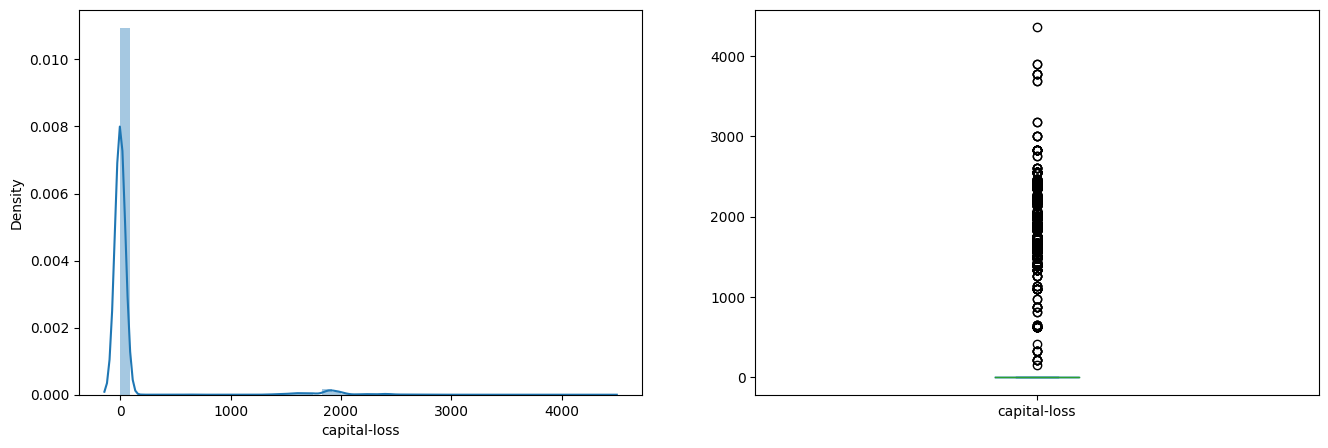

In [6]:
# Visualize skewed continuous features of original data
plt.figure(1)
plt.subplot(121)
sns.distplot(data['capital-loss']);

plt.subplot(122)
data['capital-loss'].plot.box(figsize=(16,5))
plt.show()

/var/folders/3w/qtg04t7j5798r10qlyrwnl2m0000gn/T/ipykernel_99306/3583902744.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-gain']);


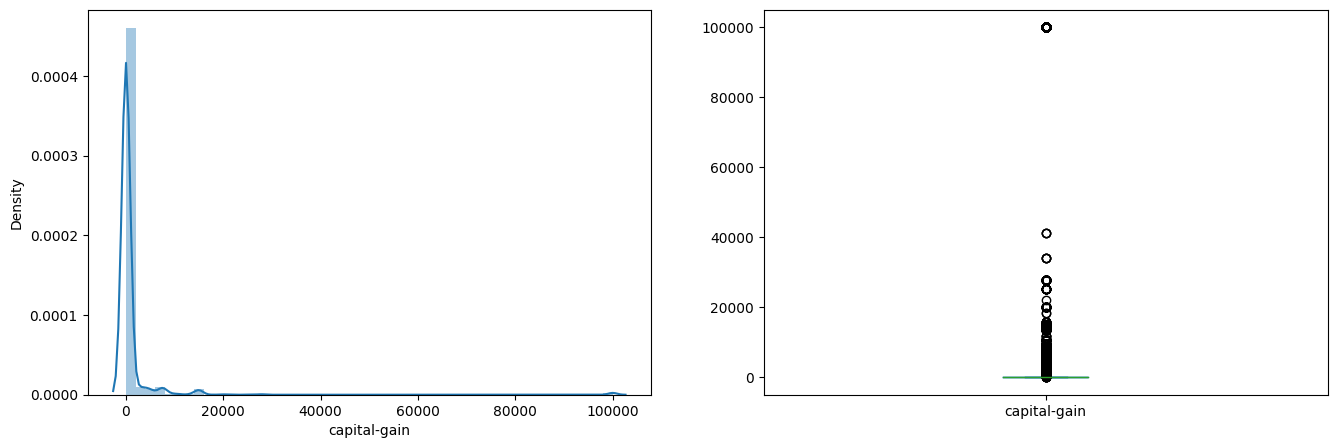

In [7]:
# Visualize skewed continuous features of original data
plt.figure(1)
plt.subplot(121)
sns.distplot(data['capital-gain']);

plt.subplot(122)
data['capital-gain'].plot.box(figsize=(16,5))
plt.show()

In [8]:
# Outliers Treatment
data['Log-Gain'] = np.log(data['capital-gain']+1)
data['Log-Loss'] = np.log(data['capital-loss']+1)

print("The skewness of the original loss is {}".format(data['capital-loss'].skew()))
print('The skewness of the LOG transformed loss is {}'.format(data['Log-Loss'].skew()))
print("The skewness of the original gain is {}".format(data['capital-gain'].skew()))
print('The skewness of the LOG transformed gain is {}'.format(data['Log-Gain'].skew()))
print('')

print("The kurtosis of the original loss is {}".format(data['capital-loss'].kurt()))
print('The kurtosis of the LOG transformed loss is {}'.format(data['Log-Loss'].kurt()))
print("The kurtosis of the original gain is {}".format(data['capital-gain'].kurt()))
print('The kurtosis of the LOG transformed gain is {}'.format(data['Log-Gain'].kurt()))


The skewness of the original loss is 4.516304152981587
The skewness of the LOG transformed loss is 4.271194769830899
The skewness of the original gain is 11.789002180291192
The skewness of the LOG transformed gain is 3.082385920215176

The kurtosis of the original loss is 19.36396949822179
The kurtosis of the LOG transformed loss is 16.262763077775634
The kurtosis of the original gain is 150.15129227909196
The kurtosis of the LOG transformed gain is 7.706655357544481


/var/folders/3w/qtg04t7j5798r10qlyrwnl2m0000gn/T/ipykernel_99306/2262166371.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log-Gain'], ax=axes[0])
/var/folders/3w/qtg04t7j5798r10qlyrwnl2m0000gn/T/ipykernel_99306/2262166371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Log-

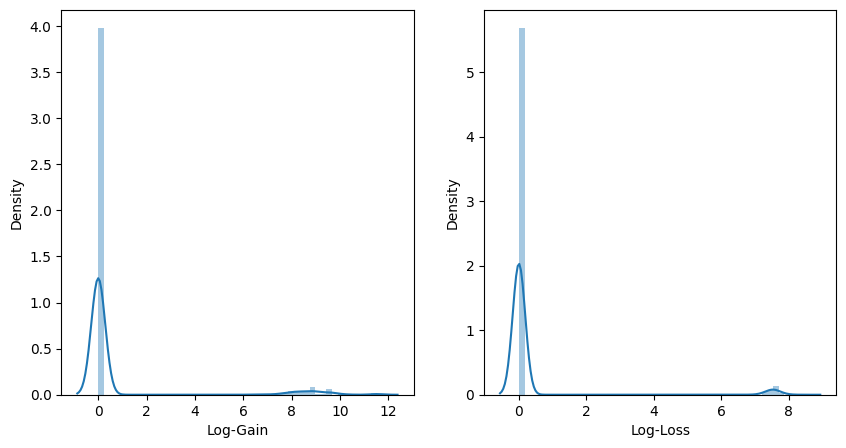

In [9]:
# plot the graph:

fig, axes = plt.subplots(1,2,figsize=(10,5))

sns.distplot(data['Log-Gain'], ax=axes[0])
sns.distplot(data['Log-Loss'], ax=axes[1])

plt.show()

In [10]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
Log-Gain           float64
Log-Loss           float64
dtype: object

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Data Transformation
numeral = ['age', 'education-num', 'hours-per-week', 'Log-Gain', 'Log-Loss']
Z_numeral = ['Z_age', 'Z_education-num', 'Z_hours-per-week', 'Z_Log-Gain', 'Z_Log-Loss']
data[Z_numeral] = StandardScaler().fit_transform(data[numeral])
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,hours-per-week,native-country,income,Log-Gain,Log-Loss,Z_age,Z_education-num,Z_hours-per-week,Z_Log-Gain,Z_Log-Loss
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,...,40.0,United-States,<=50K,7.684784,0.0,0.034201,1.128753,-0.078120,2.815336,-0.222752
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,...,13.0,United-States,<=50K,0.000000,0.0,0.866417,1.128753,-2.326738,-0.300328,-0.222752
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,...,40.0,United-States,<=50K,0.000000,0.0,-0.041455,-0.438122,-0.078120,-0.300328,-0.222752
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,...,40.0,United-States,<=50K,0.000000,0.0,1.093385,-1.221559,-0.078120,-0.300328,-0.222752
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,...,40.0,Cuba,<=50K,0.000000,0.0,-0.798015,1.128753,-0.078120,-0.300328,-0.222752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,...,40.0,United-States,<=50K,0.000000,0.0,-0.419735,1.128753,-0.078120,-0.300328,-0.222752
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,...,36.0,United-States,<=50K,0.000000,0.0,0.034201,1.128753,-0.411249,-0.300328,-0.222752
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,...,50.0,United-States,<=50K,0.000000,0.0,-0.041455,1.128753,0.754701,-0.300328,-0.222752
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,...,40.0,United-States,<=50K,8.604471,0.0,0.412481,1.128753,-0.078120,3.188207,-0.222752


In [13]:
data.dtypes

age                   int64
workclass            object
education_level      object
education-num       float64
marital-status       object
occupation           object
relationship         object
race                 object
sex                  object
capital-gain        float64
capital-loss        float64
hours-per-week      float64
native-country       object
income               object
Log-Gain            float64
Log-Loss            float64
Z_age               float64
Z_education-num     float64
Z_hours-per-week    float64
Z_Log-Gain          float64
Z_Log-Loss          float64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Perform one-hot encoding on the data
data['workclass'] = LabelEncoder().fit_transform(data['workclass'])
data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,hours-per-week,native-country,income,Log-Gain,Log-Loss,Z_age,Z_education-num,Z_hours-per-week,Z_Log-Gain,Z_Log-Loss
0,39,5,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,...,40.0,United-States,<=50K,7.684784,0.0,0.034201,1.128753,-0.078120,2.815336,-0.222752
1,50,4,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,...,13.0,United-States,<=50K,0.000000,0.0,0.866417,1.128753,-2.326738,-0.300328,-0.222752
2,38,2,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,...,40.0,United-States,<=50K,0.000000,0.0,-0.041455,-0.438122,-0.078120,-0.300328,-0.222752
3,53,2,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,...,40.0,United-States,<=50K,0.000000,0.0,1.093385,-1.221559,-0.078120,-0.300328,-0.222752
4,28,2,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,...,40.0,Cuba,<=50K,0.000000,0.0,-0.798015,1.128753,-0.078120,-0.300328,-0.222752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,2,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,...,40.0,United-States,<=50K,0.000000,0.0,-0.419735,1.128753,-0.078120,-0.300328,-0.222752
45218,39,2,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,...,36.0,United-States,<=50K,0.000000,0.0,0.034201,1.128753,-0.411249,-0.300328,-0.222752
45219,38,2,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,...,50.0,United-States,<=50K,0.000000,0.0,-0.041455,1.128753,0.754701,-0.300328,-0.222752
45220,44,2,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,...,40.0,United-States,<=50K,8.604471,0.0,0.412481,1.128753,-0.078120,3.188207,-0.222752


In [16]:
data['education_level'] = LabelEncoder().fit_transform(data['education_level'])
data['marital-status'] = LabelEncoder().fit_transform(data['marital-status'])
data['occupation'] = LabelEncoder().fit_transform(data['occupation'])
data['relationship'] = LabelEncoder().fit_transform(data['relationship'])
data['race'] = LabelEncoder().fit_transform(data['race'])
data['sex'] = LabelEncoder().fit_transform(data['sex'])
data['native-country'] = LabelEncoder().fit_transform(data['native-country'])
data['income'] = LabelEncoder().fit_transform(data['income'])

data

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,hours-per-week,native-country,income,Log-Gain,Log-Loss,Z_age,Z_education-num,Z_hours-per-week,Z_Log-Gain,Z_Log-Loss
0,39,5,9,13.0,4,0,1,4,1,2174.0,...,40.0,38,0,7.684784,0.0,0.034201,1.128753,-0.078120,2.815336,-0.222752
1,50,4,9,13.0,2,3,0,4,1,0.0,...,13.0,38,0,0.000000,0.0,0.866417,1.128753,-2.326738,-0.300328,-0.222752
2,38,2,11,9.0,0,5,1,4,1,0.0,...,40.0,38,0,0.000000,0.0,-0.041455,-0.438122,-0.078120,-0.300328,-0.222752
3,53,2,1,7.0,2,5,0,2,1,0.0,...,40.0,38,0,0.000000,0.0,1.093385,-1.221559,-0.078120,-0.300328,-0.222752
4,28,2,9,13.0,2,9,5,2,0,0.0,...,40.0,4,0,0.000000,0.0,-0.798015,1.128753,-0.078120,-0.300328,-0.222752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,2,9,13.0,4,9,3,4,1,0.0,...,40.0,38,0,0.000000,0.0,-0.419735,1.128753,-0.078120,-0.300328,-0.222752
45218,39,2,9,13.0,0,9,1,4,0,0.0,...,36.0,38,0,0.000000,0.0,0.034201,1.128753,-0.411249,-0.300328,-0.222752
45219,38,2,9,13.0,2,9,0,4,1,0.0,...,50.0,38,0,0.000000,0.0,-0.041455,1.128753,0.754701,-0.300328,-0.222752
45220,44,2,9,13.0,0,0,3,1,1,5455.0,...,40.0,38,0,8.604471,0.0,0.412481,1.128753,-0.078120,3.188207,-0.222752


In [17]:
data.dtypes

age                   int64
workclass             int64
education_level       int64
education-num       float64
marital-status        int64
occupation            int64
relationship          int64
race                  int64
sex                   int64
capital-gain        float64
capital-loss        float64
hours-per-week      float64
native-country        int64
income                int64
Log-Gain            float64
Log-Loss            float64
Z_age               float64
Z_education-num     float64
Z_hours-per-week    float64
Z_Log-Gain          float64
Z_Log-Loss          float64
dtype: object

In [18]:
columns_to_copy = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income', 'Z_age', 'Z_education-num', 'Z_hours-per-week', 'Z_Log-Gain', 'Z_Log-Loss']
new_df = data[columns_to_copy].copy()
new_df

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income,Z_age,Z_education-num,Z_hours-per-week,Z_Log-Gain,Z_Log-Loss
0,5,9,4,0,1,4,1,38,0,0.034201,1.128753,-0.078120,2.815336,-0.222752
1,4,9,2,3,0,4,1,38,0,0.866417,1.128753,-2.326738,-0.300328,-0.222752
2,2,11,0,5,1,4,1,38,0,-0.041455,-0.438122,-0.078120,-0.300328,-0.222752
3,2,1,2,5,0,2,1,38,0,1.093385,-1.221559,-0.078120,-0.300328,-0.222752
4,2,9,2,9,5,2,0,4,0,-0.798015,1.128753,-0.078120,-0.300328,-0.222752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,2,9,4,9,3,4,1,38,0,-0.419735,1.128753,-0.078120,-0.300328,-0.222752
45218,2,9,0,9,1,4,0,38,0,0.034201,1.128753,-0.411249,-0.300328,-0.222752
45219,2,9,2,9,0,4,1,38,0,-0.041455,1.128753,0.754701,-0.300328,-0.222752
45220,2,9,0,0,3,1,1,38,0,0.412481,1.128753,-0.078120,3.188207,-0.222752


### Exercise 3 Shuffle and Split Data

In [19]:
# Split the 'feature' and 'income' data into training and testing sets
Y = new_df['income']
X = new_df.drop('income', axis=1)
X

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,Z_age,Z_education-num,Z_hours-per-week,Z_Log-Gain,Z_Log-Loss
0,5,9,4,0,1,4,1,38,0.034201,1.128753,-0.078120,2.815336,-0.222752
1,4,9,2,3,0,4,1,38,0.866417,1.128753,-2.326738,-0.300328,-0.222752
2,2,11,0,5,1,4,1,38,-0.041455,-0.438122,-0.078120,-0.300328,-0.222752
3,2,1,2,5,0,2,1,38,1.093385,-1.221559,-0.078120,-0.300328,-0.222752
4,2,9,2,9,5,2,0,4,-0.798015,1.128753,-0.078120,-0.300328,-0.222752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,2,9,4,9,3,4,1,38,-0.419735,1.128753,-0.078120,-0.300328,-0.222752
45218,2,9,0,9,1,4,0,38,0.034201,1.128753,-0.411249,-0.300328,-0.222752
45219,2,9,2,9,0,4,1,38,-0.041455,1.128753,0.754701,-0.300328,-0.222752
45220,2,9,0,0,3,1,1,38,0.412481,1.128753,-0.078120,3.188207,-0.222752


In [20]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45217    0
45218    0
45219    0
45220    0
45221    1
Name: income, Length: 45222, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
## Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

# random_state ---> is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for 

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (36177, 13)
The shape of X_test is: (9045, 13)

The shape of y_train is: (36177,)
The shape of y_test is: (9045,)


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [23]:
# Evaluating Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# 创建决策树模型，并设置ccp_alpha参数
clf = DecisionTreeClassifier(random_state=24, ccp_alpha=0.01)

# 训练决策树模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算模型的准确率
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# 计算模型的F1分数
f1 = f1_score(y_test, y_pred, average='macro')  # 这里使用'macro'表示计算宏平均F1分数
print("F1 score:", f1)


accuracy: 0.8365948037589829
F1 score: 0.7413359357670768


In [24]:
import xgboost as xgb

# 创建XGBoost分类器
clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# 训练模型
clf.fit(X_train, y_train)

# 预测测试集
y_pred = clf.predict(X_test)

# 计算模型的准确率
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

# 计算模型的F1分数
f1 = f1_score(y_test, y_pred, average='macro')  # 这里使用'macro'表示计算宏平均F1分数
print("F1 score:", f1)

accuracy: 0.8694306246545053
F1 score: 0.8122380594333882


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [25]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000
temp = {'Column1': [0] * 45222}
f1 = f1_score(Y, temp['Column1'], average='macro')
f1

0.4292745721641678

### Exercise 5 Evaluating Model 

## Question:
### Q1:

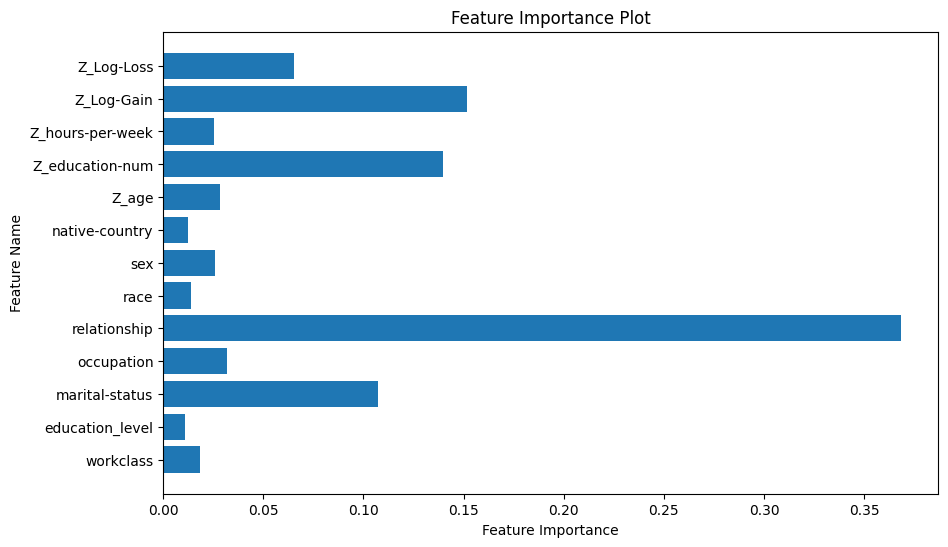

In [26]:
# 获取特征重要性
feature_importance = clf.feature_importances_

# 获取特征名称
feature_names = X.columns

# 创建特征重要性的柱状图
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Plot')

# 显示图形
plt.show()